In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb
sb.set_style('whitegrid')
from scipy import stats
from statsmodels.stats import diagnostic as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/ugoiloh/stage-f-14-house-pricing/ugoiloh/data/data.csv')

In [4]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### Descriptive Statistics

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


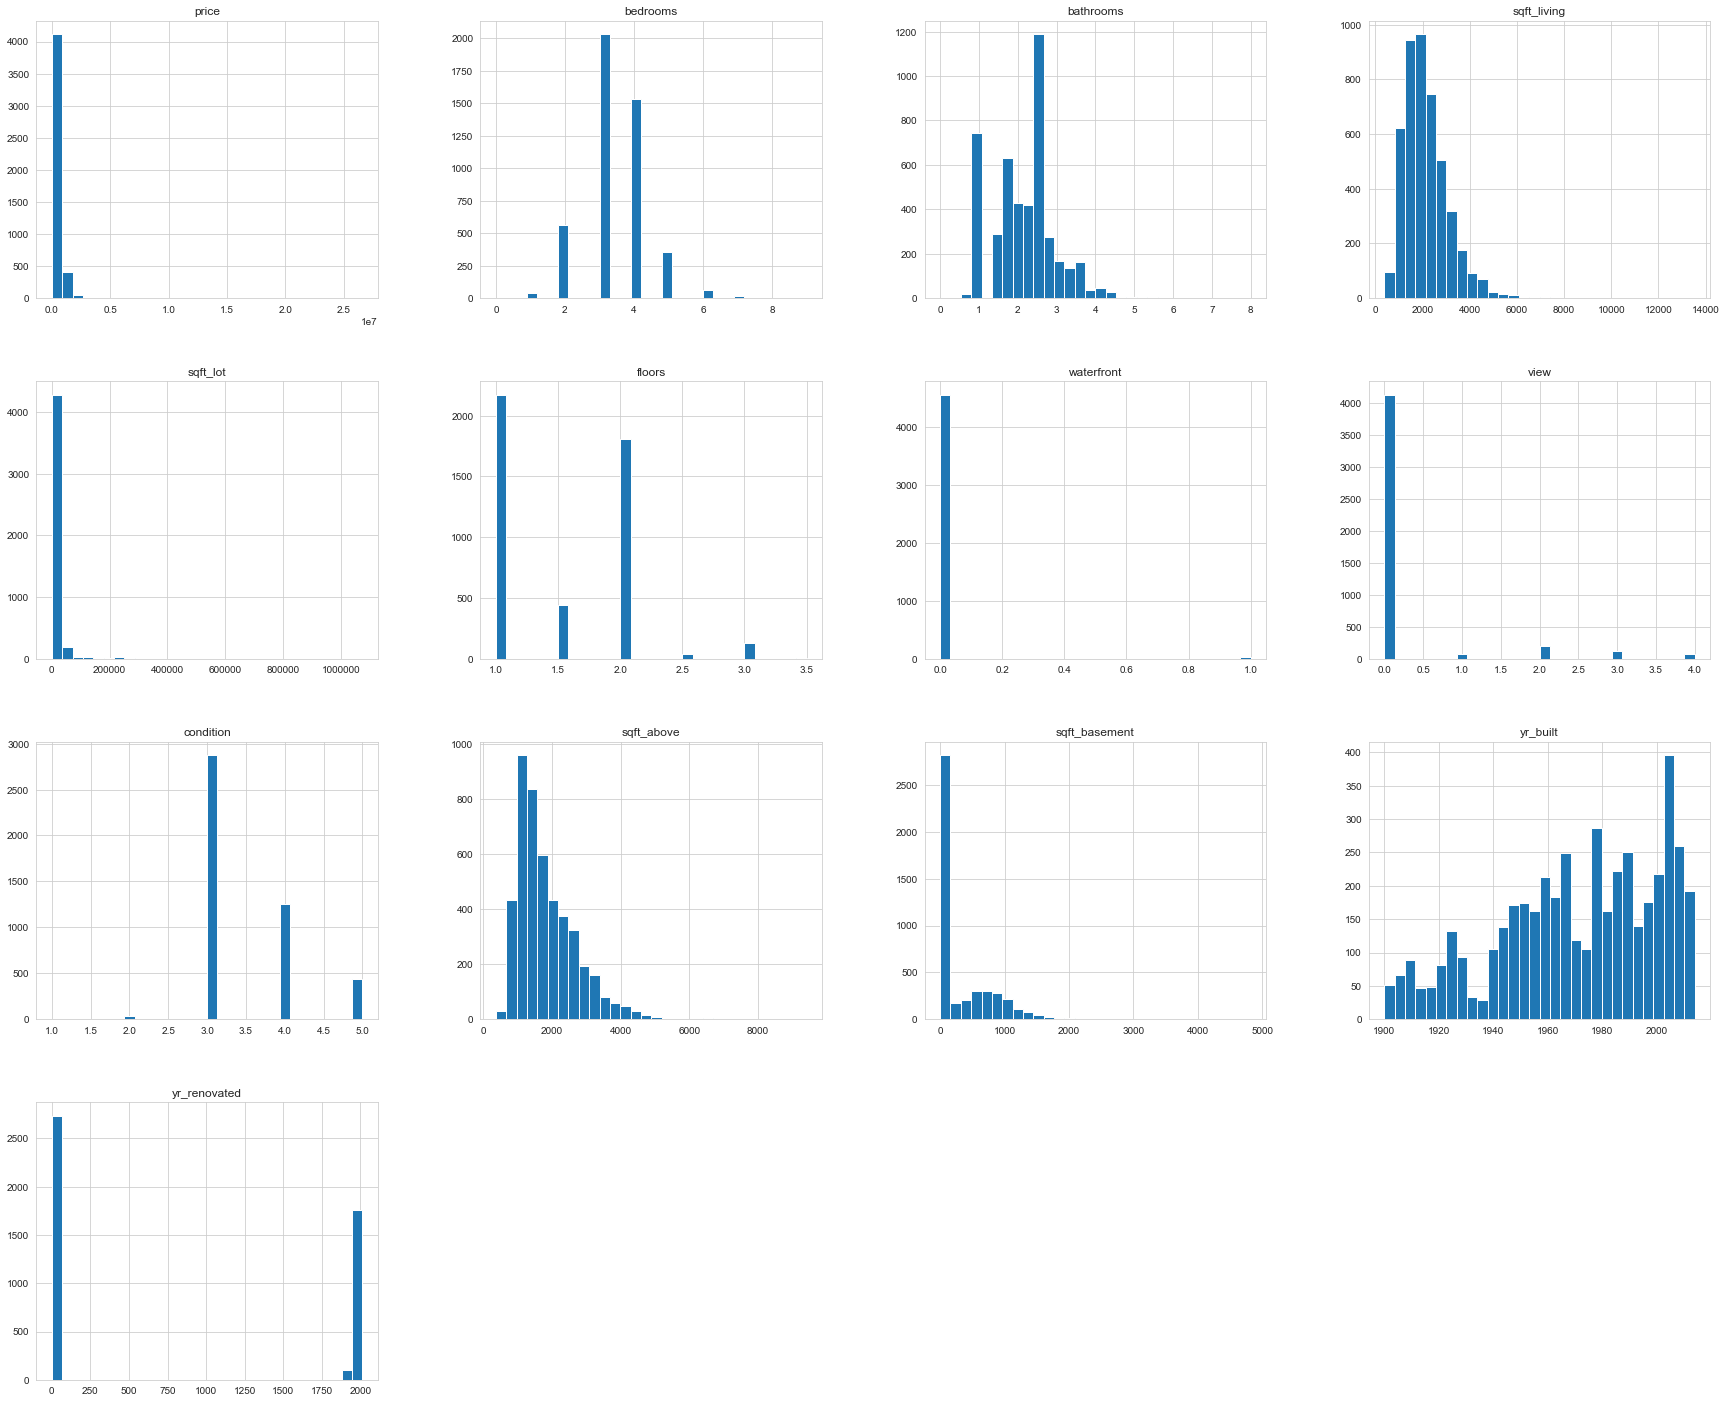

In [26]:
data.hist(bins=30, figsize=(30,25))
plt.show()

In [35]:
num_vars = [
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',]

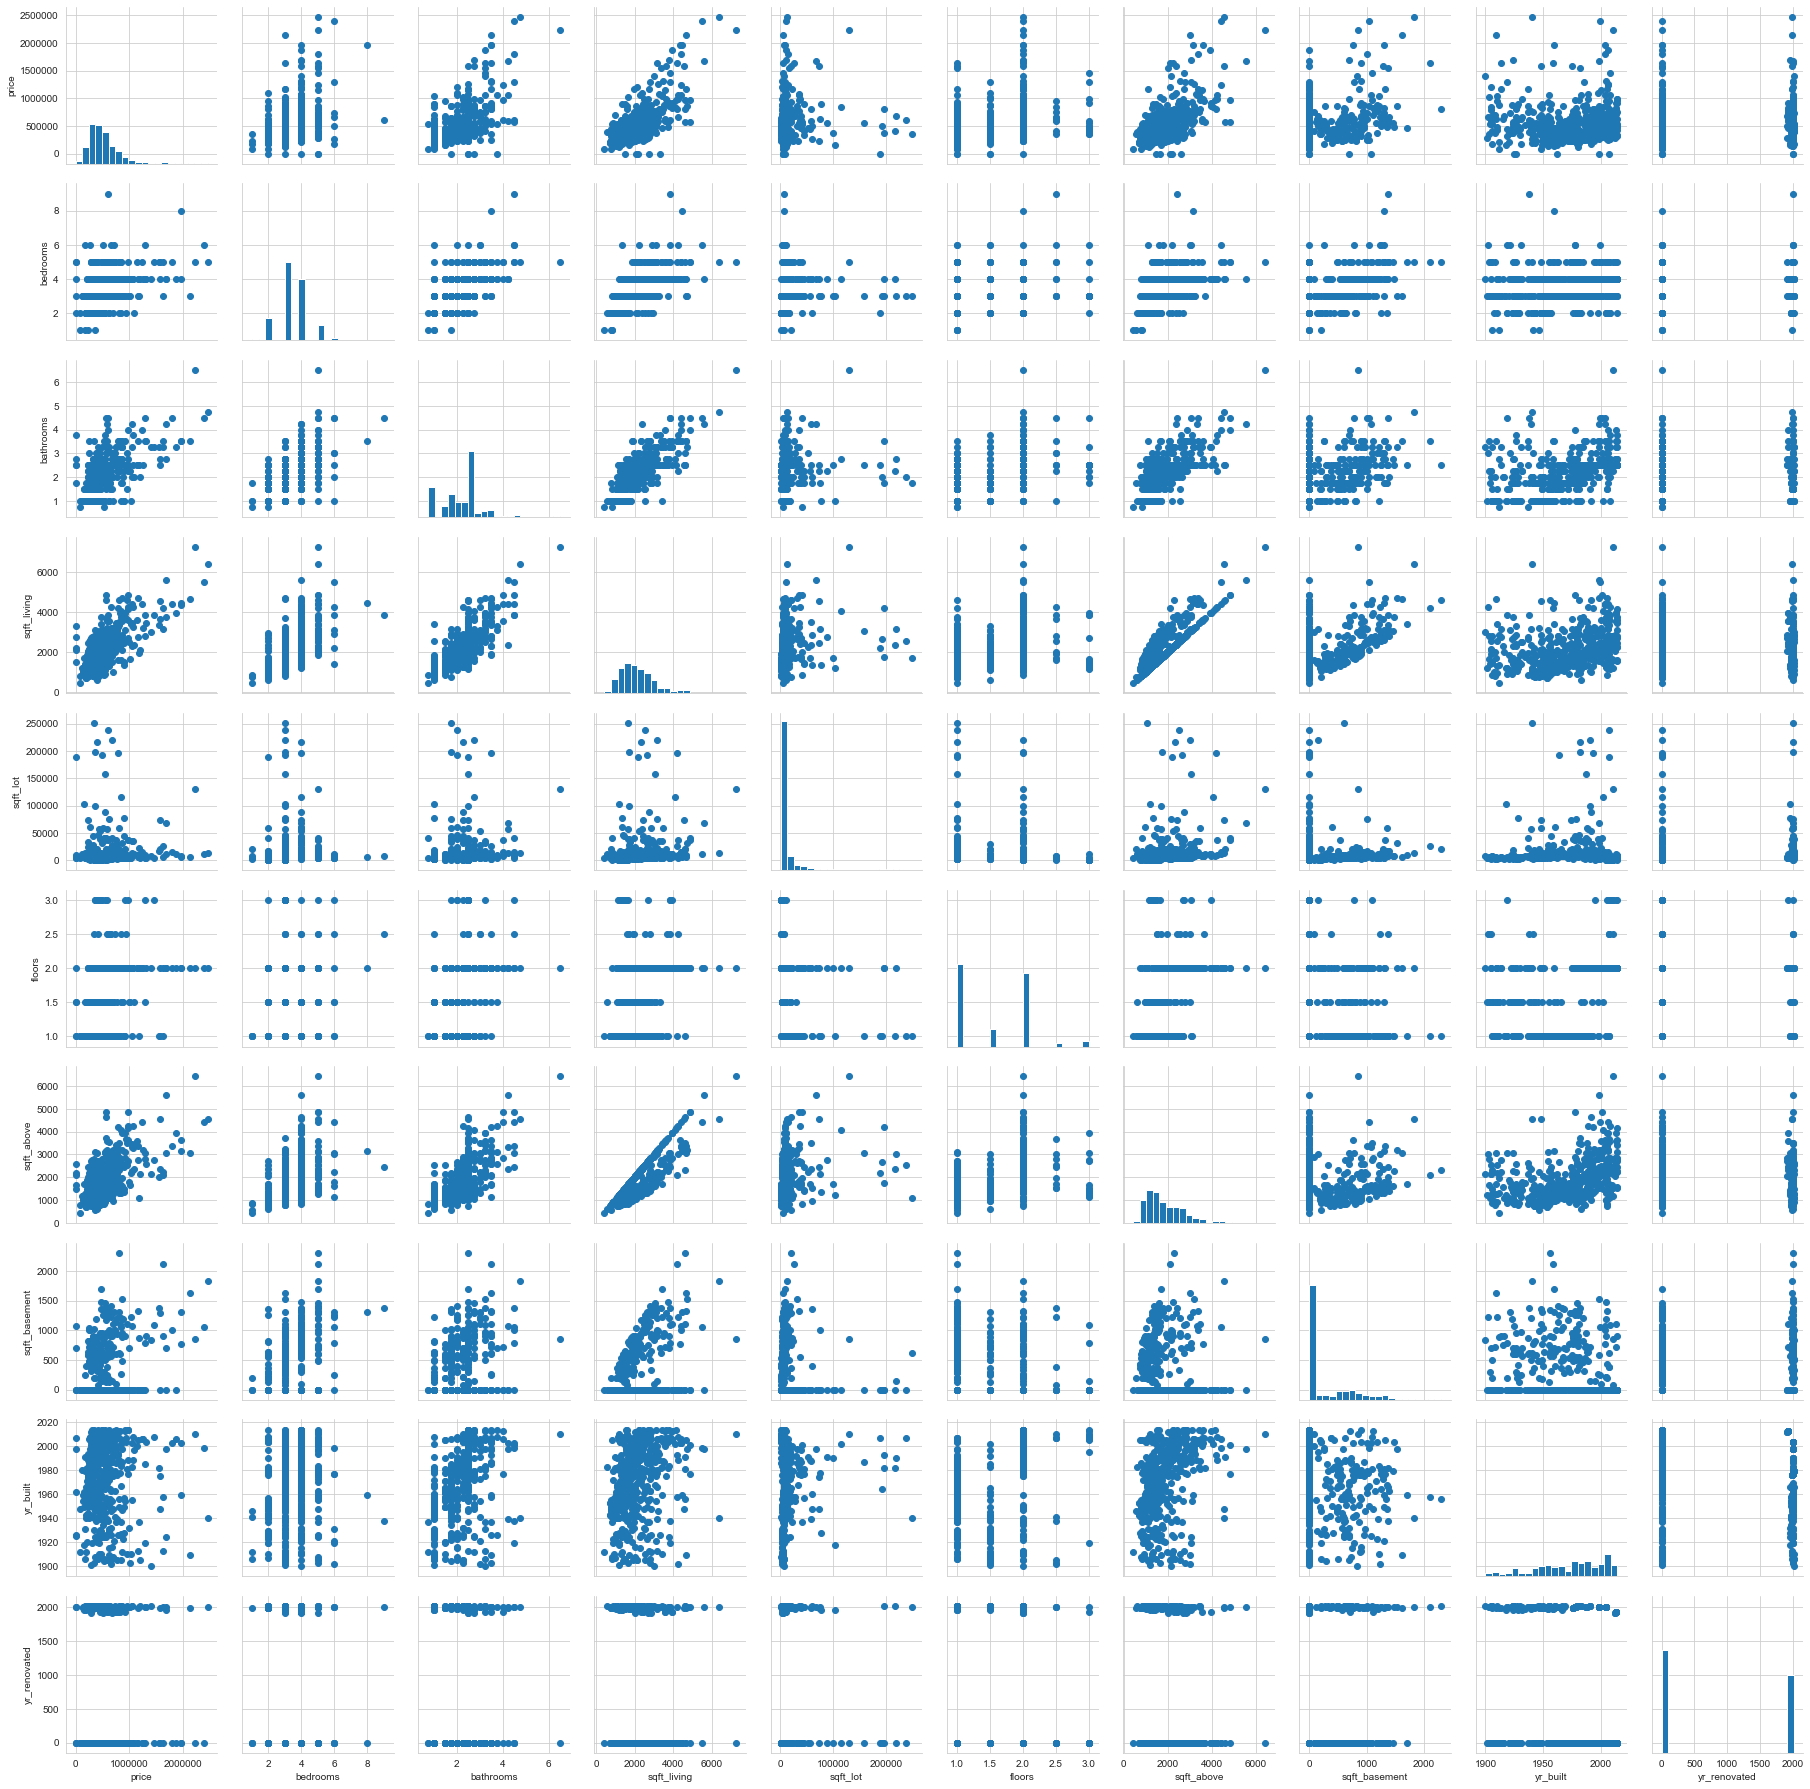

In [36]:
# plot matrix: sample 500 data points so that plots are clearer and
# they render faster
samples = np.random.choice(data.shape[0], 500, replace = False)
data_samp = data.loc[samples,:]

g = sb.PairGrid(data = data_samp, vars = num_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

## Data Exploration

### Visualizing Categorical Features

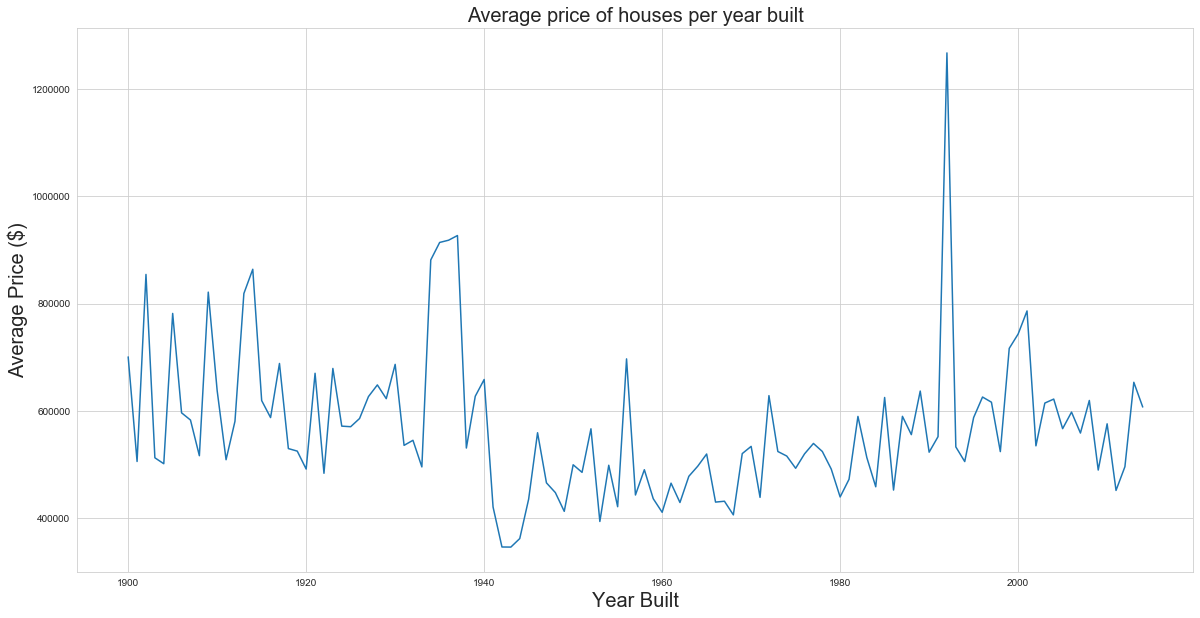

In [243]:
plt.figure(figsize=[20, 10])
yr_avg = data.groupby('yr_built')['price'].mean().reset_index()
plt.plot(yr_avg.yr_built, yr_avg.price)
plt.title('Average price of houses per year built', fontsize=20, loc='center' )
plt.xlabel('Year Built', fontsize=20)
plt.ylabel('Average Price ($)', fontsize=20);

> The year a house was built seems not to have a significant effect in the price of a house, although a significant spike in price was observed around 1991.

> Houses built in the early and later years were costlier compared to those in the middle range. The earlier houses could be due to historical effect, while the recent ones is anticipated.

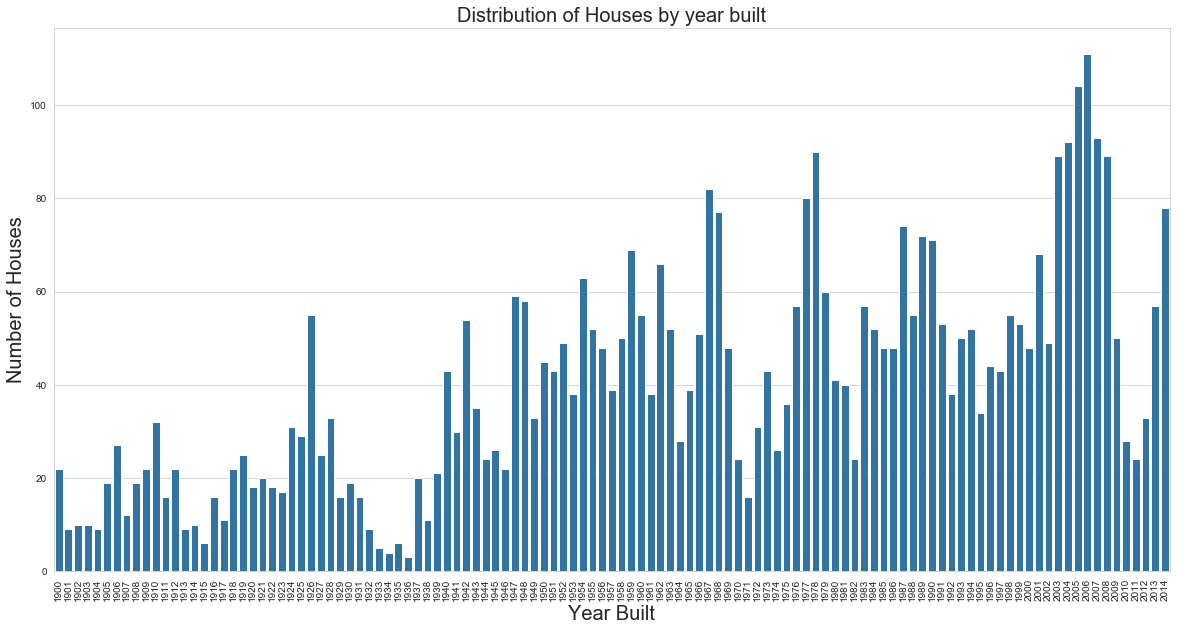

In [246]:
plt.figure(figsize=[20, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = data, x = 'yr_built', color = default_color)
plt.xticks(rotation = 90);
plt.title('Distribution of Houses by year built', fontsize=20)
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel('Year Built', fontsize=20);

> Few houses were built in the earlier years compared to recent years. In 2016 and 2017, over a hundred houses were built in each year and these were the years in which the most houses were built.

> As seen above, more houses were constructed in recent years. However, this didn't affect the prices of houses, justifying our conclusion above.

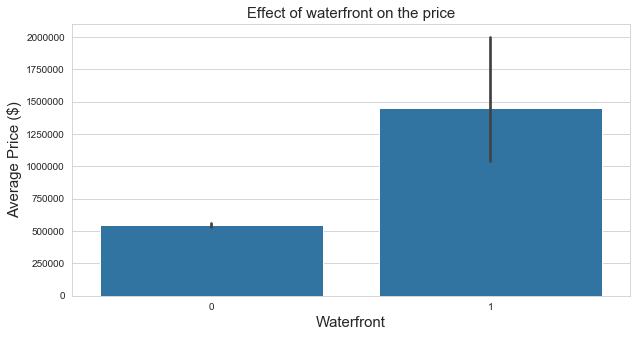

In [256]:
plt.figure(figsize=[10, 5])
sb.barplot(data = data, x = 'waterfront', y = 'price', color = default_color)
plt.title('Effect of waterfront on the price', fontsize=15)
plt.ylabel('Average Price ($)', fontsize=15)
plt.xlabel('Waterfront', fontsize=15);

> Houses with waterfront have higher prices. This will have effect on the house price prediction.

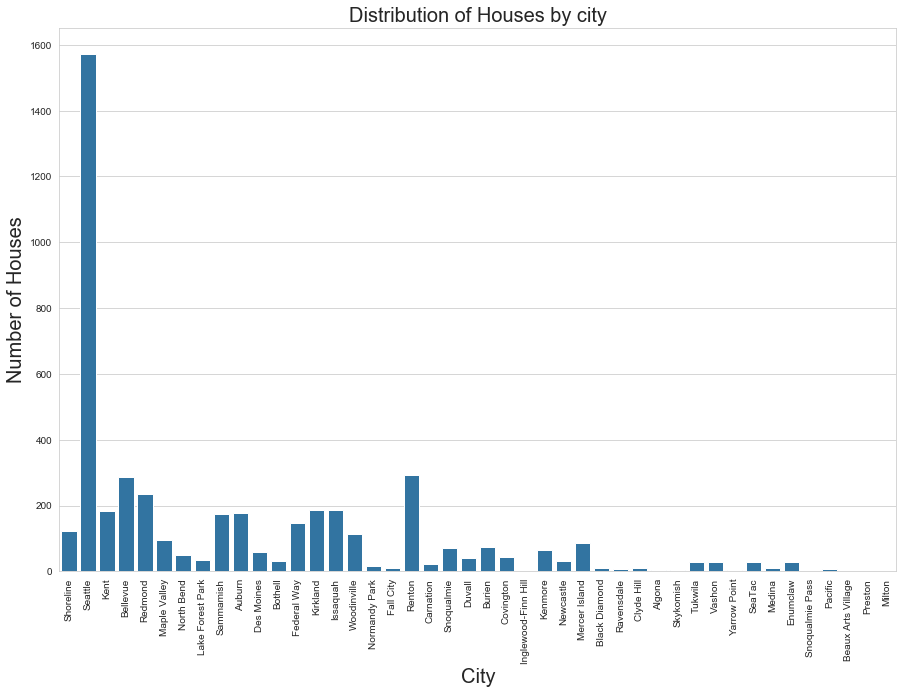

In [249]:
plt.figure(figsize=[15, 10])
default_color = sb.color_palette()[0]
sb.countplot(data = data, x = 'city', color = default_color)
plt.xticks(rotation = 90);
plt.title('Distribution of Houses by city', fontsize=20)
plt.ylabel('Number of Houses', fontsize=20)
plt.xlabel('City', fontsize=20);

>> The city Seattle in US dominated the interested of buyers. We would explore later to see how this affects the prices of house in the area.

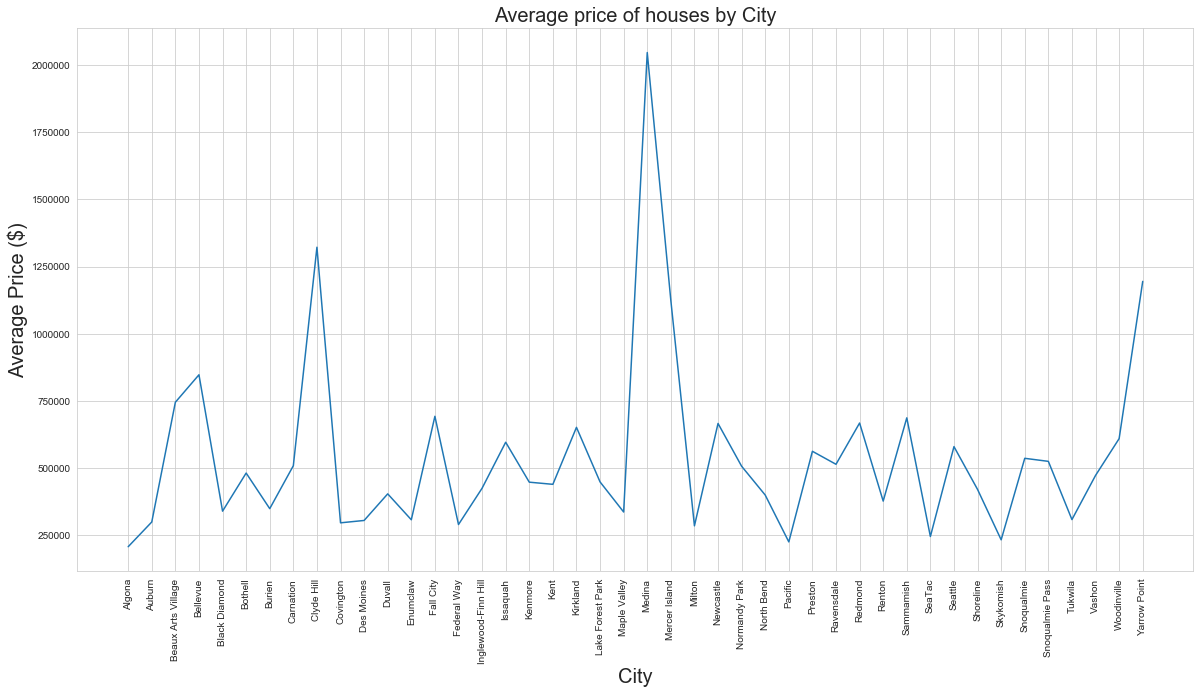

In [238]:
plt.figure(figsize=[20, 10])
city_avg = data.groupby('city')['price'].mean().reset_index()
plt.plot(city_avg.city, city_avg.price)
plt.title('Average price of houses by City', fontsize=20, loc='center' )
plt.xlabel('City', fontsize=20)
plt.ylabel('Average Price ($)', fontsize=20)
plt.xticks(rotation = 90);

> It is evident from the visual that cities were more houses were sold have relatively low prices. Medina and Clyde Hill cities on the other hand, have high prices for houses. The houses built in these cities are quite few. It could be that the cost of land and overall construction of buildings is high in these cities.

### Visualizing Numerical variable

` The numerical variables has many values in small range. To have a  better visual, we'll take average of small bin sizes and plot the average `

In [110]:
 def mean_poly(x,y, bins, bin_size, **kwargs):
    """ Custom errorbar plot """
    
    # set bin centers
    bin_centers = (bins + bin_size/2)[:-1]

    # Use pandas cut function to aggregate the trip durations based on the bin
    # compute mean in each bin
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    mean = y.groupby(data_bins).mean()

    # plot the summarized data
    plt.errorbar(x = bin_centers, y = mean, **kwargs)

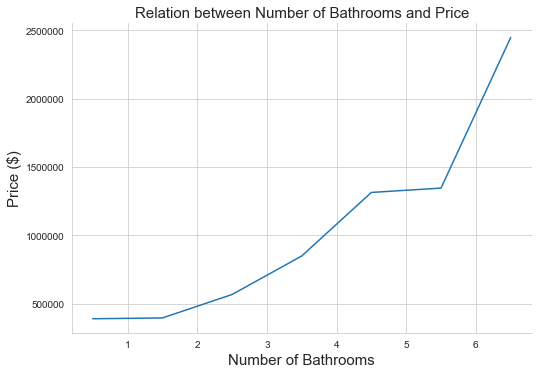

In [255]:
bin_edges = np.arange(0, data['bathrooms'].max()+1, 1)
g = sb.FacetGrid(data = data, height = 5, aspect=1.5)
g.map(mean_poly, "bathrooms", "price", bins = bin_edges, bin_size = 1)
#g.add_legend()
plt.title('Relation between Number of Bathrooms and Price', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xlabel('Number of Bathrooms', fontsize=15);

> The number of bathrooms a house has, positively affects the price of the house.

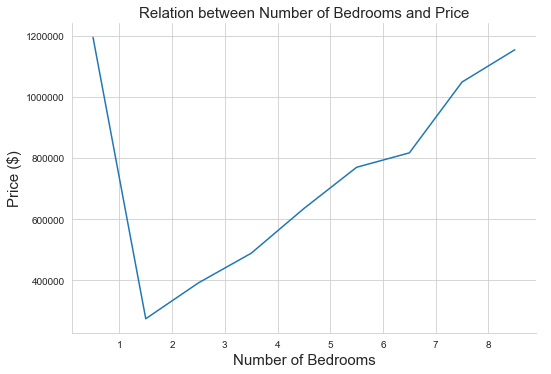

In [254]:
bin_edges = np.arange(0, data['bedrooms'].max()+1, 1)
g = sb.FacetGrid(data = data, height = 5, aspect=1.5)
g.map(mean_poly, "bedrooms", "price", bins = bin_edges, bin_size = 1)
g.add_legend()
plt.title('Relation between Number of Bedrooms and Price', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xlabel('Number of Bedrooms', fontsize=15);

> The number of bedrooms also have a positive correlation with the price of the house.

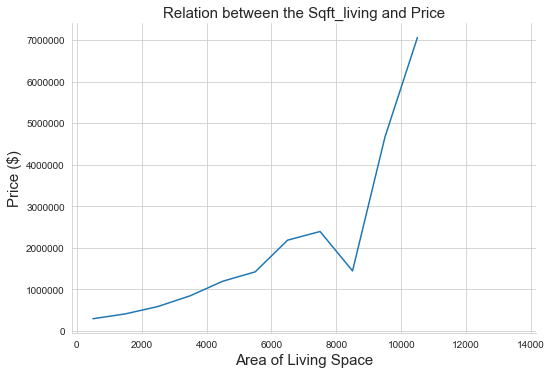

In [258]:
bin_edges = np.arange(0, data['sqft_living'].max()+1000, 1000)
g = sb.FacetGrid(data = data, height = 5, aspect=1.5)
g.map(mean_poly, "sqft_living", "price", bins = bin_edges, bin_size = 1000)
g.add_legend()
plt.title('Relation between the Sqft_living and Price', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xlabel('Area of Living Space', fontsize=15);

> The area of the living space has a positive effect on the price of houses.

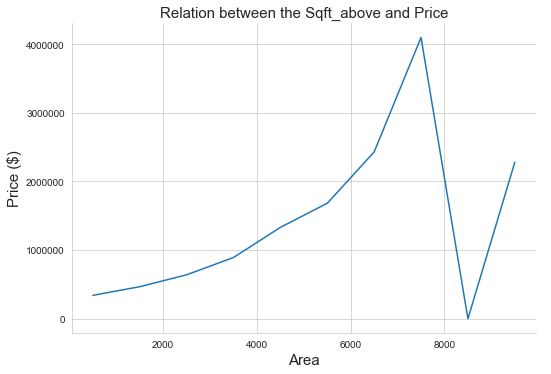

In [259]:
bin_edges = np.arange(0, data['sqft_above'].max()+1000, 1000)
g = sb.FacetGrid(data = data, height = 5, aspect=1.5)
g.map(mean_poly, "sqft_above", "price", bins = bin_edges, bin_size = 1000)
g.add_legend()
plt.title('Relation between the Sqft_above and Price', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xlabel('Area', fontsize=15);

> The house price increases as the area of the houses increases. The price however decreases as the area get too large.

### Time series Analysis

In [187]:
data1 = data.copy()

In [191]:
data1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,,,,,,,,,,,,,,,,,
2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA


In [192]:
#Extracting the month and week day of sale of houses
data1['month'] = data1.index.month_name()
data1['weekday'] = data1.index.day_name()

In [222]:
#Average price of houses per month
data1.groupby('month')['price'].mean()

month
July    614407.818959
June    547968.179909
May     533822.837768
Name: price, dtype: float64

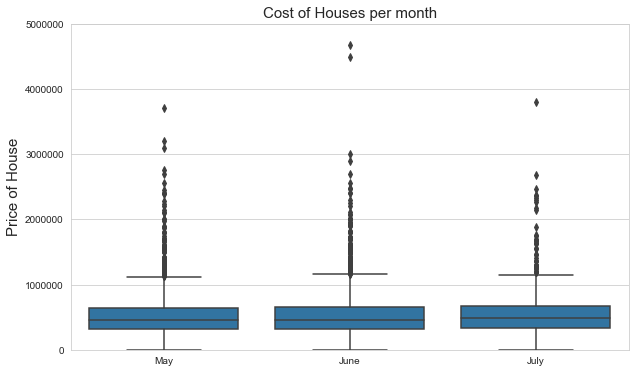

In [262]:
plt.figure(figsize=(10,6))
sb.boxplot(data = data1, x='month', y = 'price', color=default_color)
plt.xlabel('')
plt.ylabel('Price of House', fontsize=15)
plt.title('Cost of Houses per month', fontsize=15)
plt.ylim(0,5000000);

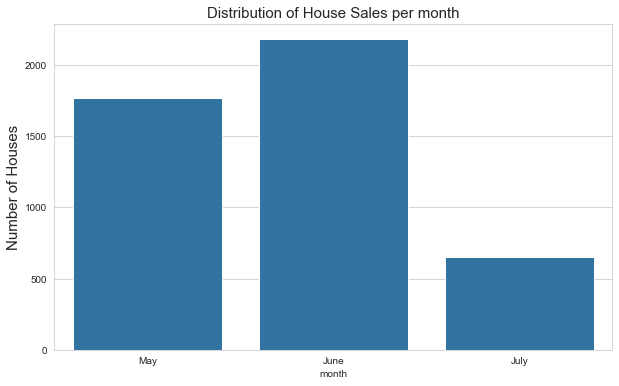

In [265]:
plt.figure(figsize=(10,6))
sb.countplot(data = data1, x = 'month', color = default_color)
plt.ylabel('Number of Houses', fontsize=15)
plt.title('Distribution of House Sales per month', fontsize=15);

In [184]:
order = ['Sunday','Saturday','Friday', 'Thursday','Wednesday','Tuesday','Monday']

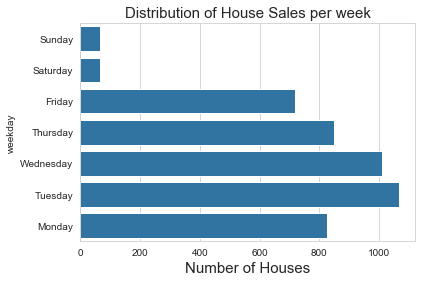

In [266]:
sb.countplot(data=data1, y = 'weekday', color=default_color, order=order)
plt.xlabel('Number of Houses', fontsize=15)
plt.title('Distribution of House Sales per week', fontsize=15);

In [171]:
#Average price of houses per week
data1.groupby('weekday')['price'].mean()

weekday
Friday       544872.720629
Monday       549120.052695
Saturday     602518.484848
Sunday       572865.538462
Thursday     577771.693337
Tuesday      543475.705610
Wednesday    541976.748715
Name: price, dtype: float64

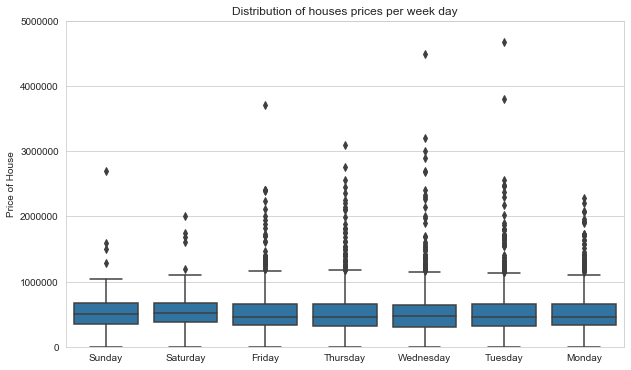

In [219]:
plt.figure(figsize=(10,6))
sb.boxplot(data = data1, x='weekday', y = 'price', color=default_color, order=order)
plt.xlabel('')
plt.ylabel('Price of House')
plt.ylim(0,5000000);
plt.title('Distribution of houses prices per week day');

> It is evident from above that the high average prices of houses on weekends and July irrespective of few houses sold on weekends and in July is due to outliers

## Conclusion

* The price of houses increases as the number of bathrooms a house has.
* The price also increases as the number of bedrooms increases.
* The area of living area and area of the house has a positive effect on the price of a house.
* The house sale information is just for three months only. This may not fully represent the house pricing for predictions.
* Seattle city has the highest number of sales, as the houses in the city are relatively cheap.
* Most sales were made on Tuesdays and Wednesdays of the week and few houses sold on weekends.
* Houses built in earlier and recent years were costlier.
* Houses with waterfront are costlier.
* More houses were built in the recent years.